In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
li=pd.read_csv("E:/datasets/insuranceLiner.csv")

In [3]:
li.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
li.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
li.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()

In [13]:
li.sex=le.fit_transform(li.sex)
li.smoker=le.fit_transform(li.smoker)
li.region=le.fit_transform(li.region)

In [14]:
li.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
from sklearn.model_selection import train_test_split

In [45]:
li_train,li_test=train_test_split(li,test_size=.2,random_state=555)

In [46]:
li_train_x=li_train.iloc[:,0:6]
li_train_y=li_train.iloc[:,-1]
li_test_x=li_test.iloc[:,0:6]
li_test_y=li_test.iloc[:,-1]

In [47]:
li_train_y.head()

88       8026.6666
938      2304.0022
1064     5708.8670
564      2801.2588
246     12648.7034
Name: charges, dtype: float64

In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [49]:
lr.fit(li_train_x,li_train_y)

LinearRegression()

In [50]:
Rsquare=lr.score(li_train_x,li_train_y)
Rsquare

0.5997965335689959

In [51]:
N=li_train_x.shape[0]
K=li_train_x.shape[1]
AdjRsquare=1-(1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.5973387845428075

In [52]:
li_pred_train=lr.predict(li_train_x)
li_pred_test=lr.predict(li_test_x)

In [53]:
error_train=li_train_y-li_pred_train
error_test=li_test_y-li_pred_test

In [54]:
MAPE=np.mean(np.abs(error_test*100/li_test_y))
MAPE

40.152011843250186

In [55]:
Accuracy=100-MAPE
Accuracy

59.847988156749814

In [56]:
### Now let us check Assumption
np.mean(error_train)

-1.5527958322952435e-13

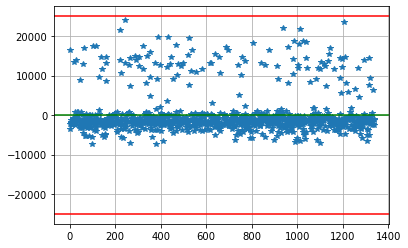

In [57]:
plt.plot(error_train,"*")
plt.axhline(y=25000,color="r")
plt.axhline(y=-25000,color="r")
plt.axhline(y=np.mean(error_train),color="g")
plt.grid()

<Figure size 1080x1080 with 0 Axes>

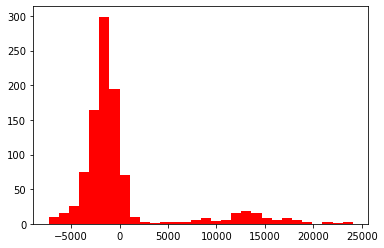

<Figure size 1080x1080 with 0 Axes>

In [58]:
plt.hist(error_train,bins=30,color="r")
plt.figure(figsize=(15,15))

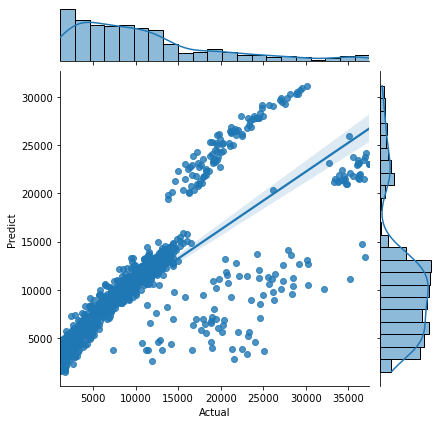

In [59]:
import seaborn as sns
pred_actual=pd.DataFrame({"Predict":li_pred_train,"Actual":li_train_y})
sns.jointplot(x="Actual",y="Predict",data=pred_actual,kind='reg')

In [42]:
def remove_outliers(df, col , k ):
    mean = df[col].mean()
    global df1
    sd = df[col].std()
    global final_list
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[ df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outliers removed == >" , df.shape[0] - df1.shape[0])

In [43]:
remove_outliers(li, 'charges' , 2)

(1231, 7)
Number of outliers removed == > 107


In [44]:
li=df1